Transforming raw data into more readable form.

In [13]:
import numpy as np
import pandas as pd

np.random.seed(42)

raw_data = pd.read_csv("./data/raw_data.csv")
raw_data = raw_data.drop(columns=[raw_data.columns[1]])
raw_data.rename(columns={raw_data.columns[0]: "date", raw_data.columns[1]: "rate"}, inplace=True)
raw_data.to_csv("data/euro_rates_total.csv", index=False)

Sorting data by year

In [14]:
df = pd.read_csv("data/euro_rates_total.csv", dtype={"rate": float}, parse_dates=["date"])
sorted_by_year = {year: group for year, group in df.groupby(df["date"].dt.year)}
for year, year_data in sorted_by_year.items():
    year_data.to_csv(f"data/euro_rates_{year}.csv", index=False)


Function for extracting the data

In [15]:
from typing import Iterable

DATA_PATH_PATTERN = "data/euro_rates_{year}.csv"

def get_data(years = Iterable[int]):
    data_list = []
    for year in years:
        data_list.append(
            pd.read_csv(DATA_PATH_PATTERN.format(year=year), parse_dates=["date"])
        )
    return pd.concat(data_list, ignore_index=True)

## Vasicek model simulation

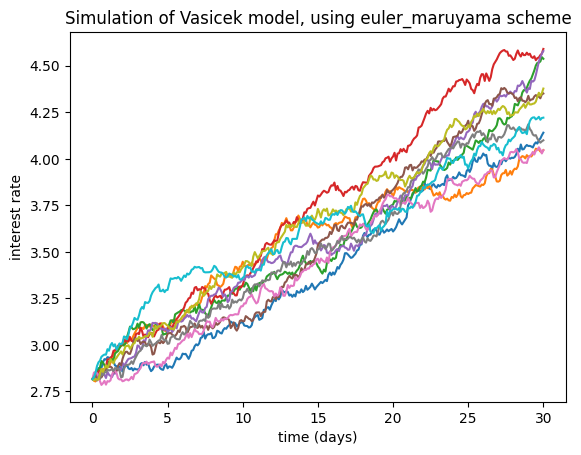

In [16]:
from models import Vasicek

data = get_data(range(2020, 2025))
vasicek = Vasicek.calibrate_with_data(data)
vasicek.plot_simulation(data.rate.iloc[-1], 30, 300, sim_num=10)

## CIR model

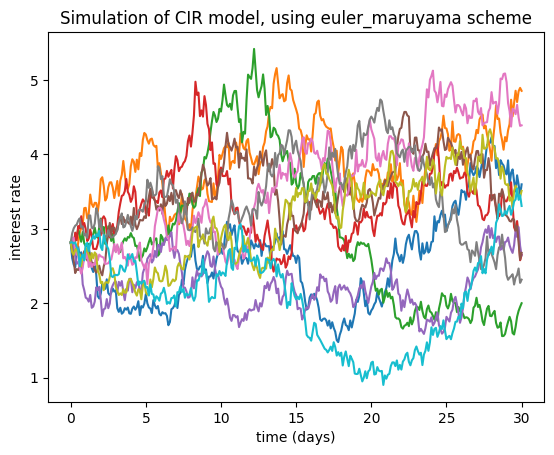

In [17]:
from models import CIR

data = get_data(range(2015, 2025))
data = data[data.rate > 0]
cir = CIR.calibrate_with_data(data)
cir.plot_simulation(data.rate.iloc[-1], 30, 300, sim_num=10)


Simulation of RB model

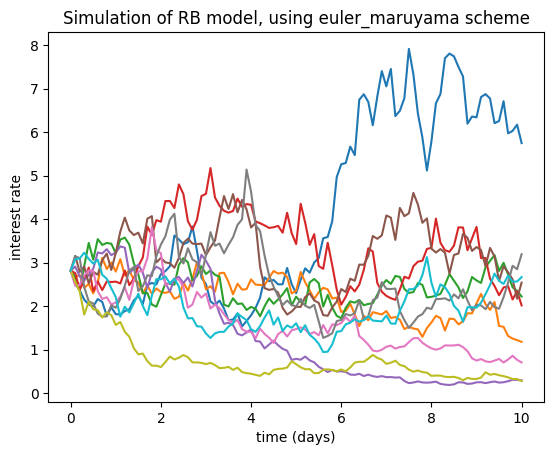

In [18]:
from models import RB


data = get_data(range(2015, 2025))
rb = RB.calibrate_with_data(data)
rb.plot_simulation(data.rate.iloc[-1], 20, 200, sim_num=10)